# Predicting the Survival of Titanic Passengers

### By Thomas Bierly

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

![H.M.S. Titanic](Titanic1.jpeg "H.M.S. Titanic")

## Machine learning process
The process for developing trustworthy machine learning systems is a bit too complex for our webinar (detailed in the picture below). For this exercise I used data from the kaggle.com “Titanic: Machine Learning from Disaster” Competition. I have already cleaned this data and prepared it for ML. I have also already evaluated machine learning methods and tuned the hyperparamaters for the model we will be using today.

For more details on this process, see: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

![Process](process.png "Process")

## Import Libraries

In [140]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import mitosheet
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Display pretty pictures
from IPython.display import Image

# OS tweaks for mitosheet
import os
os.environ['NUMEXPR_MAX_THREADS'] = '20' # the number of CPU cores

## Import Dataset

In [141]:
test_o_df = pd.read_csv("test.csv")
train_o_df = pd.read_csv("train.csv")

In [142]:
mitosheet.sheet(train_o_df)

MitoWidget(analysis_data_json='{"analysisName": "UUID-33d98667-cfe4-4207-9af1-1c4a9ea20c21", "code": {"imports…

#### Missing values?

In [143]:
total = train_o_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_o_df.isnull().sum()/train_o_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

## How do we predict who lives and dies?

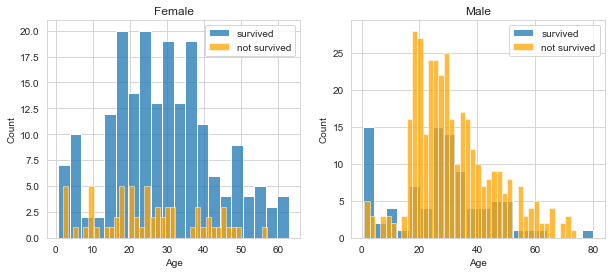

In [144]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = train_o_df[train_o_df['Sex']=='female']
men = train_o_df[train_o_df['Sex']=='male']

ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0], kde =False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color = "orange")
ax.legend()
ax.set_title('Female')

ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color = "orange")
ax.legend()
_ = ax.set_title('Male')

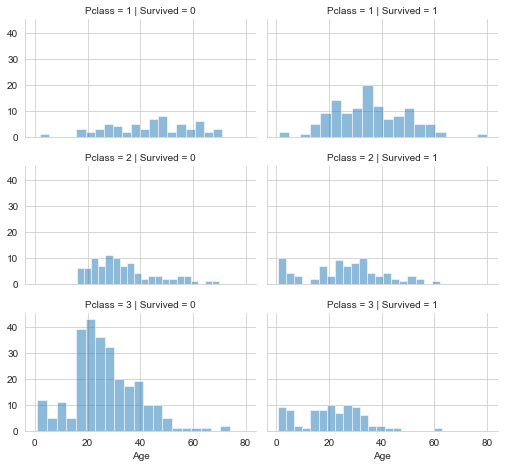

In [145]:
grid = sns.FacetGrid(train_o_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## Import Cleaned, Feature Rich, Data
![Titanic Cabins](Titanic2.png "Titanic Cabins")

In [146]:
test_df = pd.read_csv("test_clean.csv")
train_df = pd.read_csv("train_clean.csv")

In [147]:
test_df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

## Random Forest Machine Learning
![Random Forest](randomforest.png "Random Forest")

In [148]:
# X_train are the predictive features
X_train = train_df.drop("Survived", axis=1)

#Y_train is the outcome
Y_train = train_df["Survived"]

X_test  = test_df.drop("PassengerId", axis=1).copy()

In [149]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC Score:", round(r_a_score, 4)*100, "%")

ROC-AUC Score: 94.44 %


C:\Users\Thomas\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:X does not have valid feature names, but RandomForestClassifier was fitted with feature names


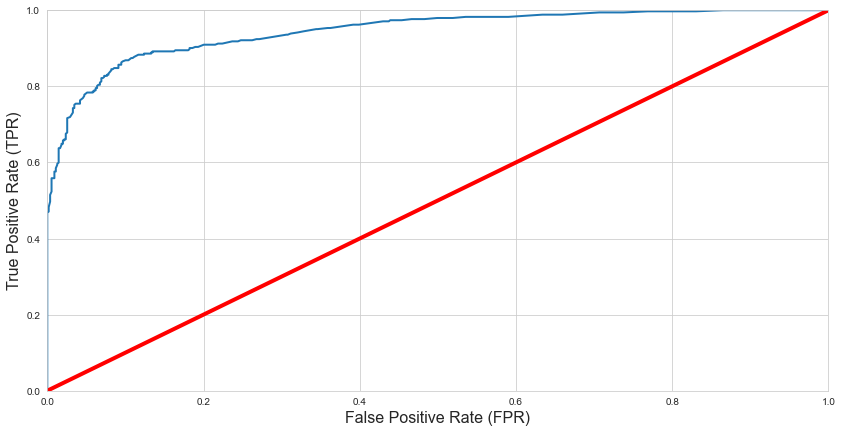

In [150]:
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [151]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)*100})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='feature'>

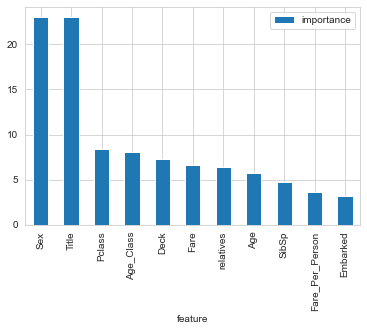

In [152]:
importances.plot.bar()

## The Prediction
![Titanic Sinking](titanic_sinking.jpg "Titanic Sinking")

In [153]:
# select the passenger record (dataframe row)
passenger = 11

singleX = X_test.iloc[[passenger]]
single_o_X = test_o_df.iloc[[passenger]]
single_o_X

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Deceased


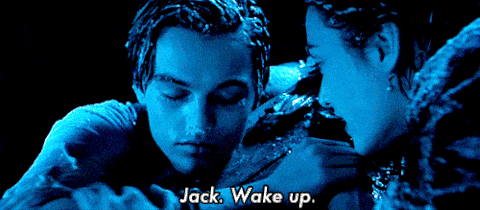

In [154]:
# Make the Prediction
Y_prediction = random_forest.predict(singleX)

if Y_prediction == 1:
    pic = 'rose'
    alive = 'Survived'
else:
    pic = 'jack'
    alive = 'Deceased'
    
print('\033[1m' + alive + '\033[0m')
Image(filename=pic+'.gif')